### **讀入資料**

> 可以從第一個實作複製過來

In [1]:
import pandas as pd

# TODO：貼上網址抓資料
url = "https://raw.githubusercontent.com/CSIE-Camp/example_code_2024/main/ML/1_Machine_Learning/807/chinese_science_score.csv"
data = pd.read_csv(url)

### **計算 gradient descent**

> 設定 x, y（上一個實作一樣有）

In [2]:
x = data['chinese']
y = data['science']

> 計算 gradient descent

In [3]:
a = 100
b = 100

a_gradient = 2 * x * (a * x + b - y)
b_gradient = 2 * (a * x + b - y)

# TODO：計算平均結果
a_gradient = (2 * x * (a * x + b - y)).mean()
b_gradient = (2 * (a * x + b - y)).mean()

> 包成 function 方便計算

In [4]:
def compute_gradient(x, y, a, b):

    a_gradient = (2 * x * (a * x + b - y)).mean()
    b_gradient = (2 * (a * x + b - y)).mean()

    return a_gradient, b_gradient

> 測試 compute_gradient()

In [6]:
compute_gradient(x, y, 10, 10)

(19641.58620689655, 230.13793103448276)

> 觀察 a, b 的變動

In [7]:
a = 100
b = 100
a_gradient, b_gradient = compute_gradient(x, y, a, b)

learning_rate = 0.0000001

# TODO：移動 a, b 的數值（learning rate）
a = a - a_gradient * learning_rate
b = b - b_gradient * learning_rate

### **觀察是否 loss 值有下降**

> loss function（上一個實作有程式碼）

In [8]:
def compute_loss(x, y, a, b):
    y_pred = a*x + b
    loss = (y - y_pred)**2
    loss = loss.sum() / len(x)

    return loss

> 觀察 loss 是否下降

In [9]:
a = 0
b = 0

# TODO：印出 loss 值
print(compute_loss(x, y, a, b))

a_gradient, b_gradient = compute_gradient(x, y, a, b)

learning_rate = 0.0000001
a = a - a_gradient * learning_rate
b = b - b_gradient * learning_rate

# TODO：印出 loss 值
print(compute_loss(x, y, a, b))

6548.758620689655
6539.330924130631


> 上面只有 1 次，現在試試看 10 次

In [11]:
a = 100
b = 100
learning_rate = 0.0000001

for i in range(30):
    a_gradient, b_gradient = compute_gradient(x, y, a, b)

    a = a - a_gradient * learning_rate
    b = b - b_gradient * learning_rate

    loss = compute_loss(x, y, a, b)
    
    print(f"第 {i:3} 次更新: Loss: {loss:.2f}, a: {a:.2f}, b: {b:.2f}, a_gradient: {a_gradient:.2f}, b_gradient: {b_gradient:.2f}")

第   0 次更新: Loss: 47063074.08, a: 99.91, b: 100.00, a_gradient: 940716.83, b_gradient: 12043.45
第   1 次更新: Loss: 46974772.29, a: 99.81, b: 100.00, a_gradient: 939833.88, b_gradient: 12032.16
第   2 次更新: Loss: 46886636.18, a: 99.72, b: 100.00, a_gradient: 938951.77, b_gradient: 12020.89
第   3 次更新: Loss: 46798665.44, a: 99.62, b: 100.00, a_gradient: 938070.48, b_gradient: 12009.63
第   4 次更新: Loss: 46710859.75, a: 99.53, b: 99.99, a_gradient: 937190.01, b_gradient: 11998.37
第   5 次更新: Loss: 46623218.82, a: 99.44, b: 99.99, a_gradient: 936310.38, b_gradient: 11987.13
第   6 次更新: Loss: 46535742.33, a: 99.34, b: 99.99, a_gradient: 935431.57, b_gradient: 11975.90
第   7 次更新: Loss: 46448429.97, a: 99.25, b: 99.99, a_gradient: 934553.58, b_gradient: 11964.68
第   8 次更新: Loss: 46361281.43, a: 99.16, b: 99.99, a_gradient: 933676.42, b_gradient: 11953.47
第   9 次更新: Loss: 46274296.41, a: 99.06, b: 99.99, a_gradient: 932800.09, b_gradient: 11942.27
第  10 次更新: Loss: 46187474.60, a: 98.97, b: 99.99, a_grad

> 包成一個 function

In [12]:
def gradient_descent(x, y, a, b, learning_rate, loss_function, gradient_function, run_iter, show_iter):
    # 把過程中的都記錄下來
    loss_hist = []
    a_hist = []
    b_hist = []
    
    for i in range(run_iter):
        
        a_gradient, b_gradient = gradient_function(x, y, a, b)

        a = a - a_gradient * learning_rate
        b = b - b_gradient * learning_rate

        loss = loss_function(x, y, a, b)

        loss_hist.append(loss)
        a_hist.append(a)
        b_hist.append(b)

        if i%show_iter == 0:
            print(f"第 {i:3} 次更新: Loss: {loss:.2f}, a: {a:.2f}, b: {b:.2f}, a_gradient: {a_gradient:.2f}, b_gradient: {b_gradient:.2f}") # 增加斜率
    
    # 回傳 a, b 最終值、過程中的 a, b, loss
    return a, b, a_hist, b_hist, loss_hist

> 測試 function

In [14]:
a = 100
b = 100
learning_rate = 0.0000001
run_iter = 10000
show_iter = 2000

a_final, b_final, a_hist, b_hist, loss_hist = gradient_descent(x, y, a, b, learning_rate, compute_loss, compute_gradient, run_iter, show_iter)

第   0 次更新: Loss: 47063074.08, a: 99.91, b: 100.00, a_gradient: 940716.83, b_gradient: 12043.45
第 2000 次更新: Loss: 1101319.91, a: 15.08, b: 98.91, a_gradient: 143823.03, b_gradient: 1858.71
第 4000 次更新: Loss: 26991.58, a: 2.11, b: 98.74, a_gradient: 21988.43, b_gradient: 301.60
第 6000 次更新: Loss: 1879.72, a: 0.13, b: 98.71, a_gradient: 3361.52, b_gradient: 63.53
第 8000 次更新: Loss: 1292.67, a: -0.17, b: 98.70, a_gradient: 513.71, b_gradient: 27.14
第 10000 次更新: Loss: 1278.86, a: -0.22, b: 98.70, a_gradient: 78.32, b_gradient: 21.57


> 查看最終 a 跟 b 值

In [15]:
print(f"最終 a, b = ({a_final}, {b_final})")
# 顯示兩位小數就好
print(f"最終 a, b = ({a_final:.2f}, {b_final:.2f})")

最終 a, b = (-0.21823806840749527, 98.6985813303567)
最終 a, b = (-0.22, 98.70)


### **畫圖觀察 loss 趨勢**

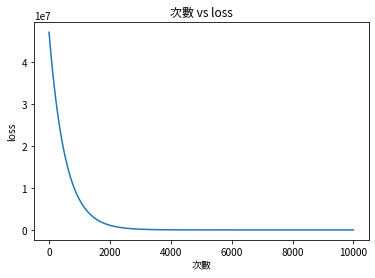

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# TODO：畫出所有 loss_hist 值
plt.plot(np.arange(0, run_iter), loss_hist)

plt.title("次數 vs loss")
plt.xlabel("次數")
plt.ylabel("loss")

plt.show()

> 中文字體（同樣從前面複製）

In [17]:
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family = "ChineseFont")

### **畫圖觀察 3D 的移動軌跡**

> 窮舉所有 loss 值

In [19]:
import numpy as np

a_all = np.arange(-100, 101)
b_all = np.arange(-100, 101)
loss_all = np.zeros((201, 201))

i = 0
for a in a_all:
    j = 0
    for b in b_all:
        loss = compute_loss(x, y, a, b)
        loss_all[i, j] = loss
        j = j+1
    i = i+1

> 把畫 3D 圖 的程式碼複製過來

949.6206896551724
[100] [175] [0] [75]


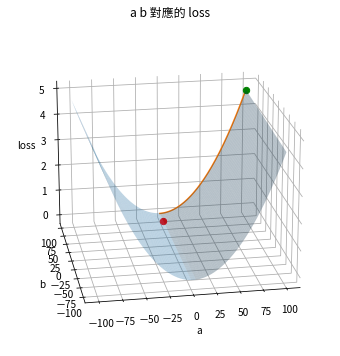

In [20]:
plt.figure(figsize=(6, 6)) # 圖片大小

ax = plt.axes(projection = "3d")
ax.view_init(20, -100) # 查看視角
ax.xaxis.set_pane_color((1, 1, 1)) # 背景顏色
ax.yaxis.set_pane_color((1, 1, 1))
ax.zaxis.set_pane_color((1, 1, 1))

b_grid, a_grid = np.meshgrid(b_all, a_all) # 網格化
######   https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
ax.plot_surface(a_grid, b_grid, loss_all, alpha=0.3)

# 設定資訊
ax.set_title("a b 對應的 loss")
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("loss")

# 尋找 loss 最少的點
print(np.min(loss_all))
a_index, b_index = np.where(loss_all == np.min(loss_all))
print(a_index, b_index, a_all[a_index], b_all[b_index])
ax.scatter(a_all[a_index], b_all[b_index], loss_all[a_index, b_index], color="red", s=40)

# TODO：劃出軌跡
ax.scatter(a_hist[0], b_hist[0], loss_hist[0], color="green", s = 40)
ax.plot(a_hist, b_hist, loss_hist)

plt.show()

> 把 gradient_descent() 移下來方便操作

In [21]:
a = 100
b = 100
learning_rate = 0.0000001
run_iter = 10000
show_iter = 2000

a_final, b_final, a_hist, b_hist, loss_hist = gradient_descent(x, y, a, b, learning_rate, compute_loss, compute_gradient, run_iter, show_iter)

第   0 次更新: Loss: 47063074.08, a: 99.91, b: 100.00, a_gradient: 940716.83, b_gradient: 12043.45
第 2000 次更新: Loss: 1101319.91, a: 15.08, b: 98.91, a_gradient: 143823.03, b_gradient: 1858.71
第 4000 次更新: Loss: 26991.58, a: 2.11, b: 98.74, a_gradient: 21988.43, b_gradient: 301.60
第 6000 次更新: Loss: 1879.72, a: 0.13, b: 98.71, a_gradient: 3361.52, b_gradient: 63.53
第 8000 次更新: Loss: 1292.67, a: -0.17, b: 98.70, a_gradient: 513.71, b_gradient: 27.14
